<a href="https://colab.research.google.com/github/lualua0909/DeepLearning-LDS8/blob/main/Week_2/demo_ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Demo ANN**


In [1]:
import pandas as pd

In [2]:

red_wine = pd.read_csv('https://raw.githubusercontent.com/lualua0909/DeepLearning-LDS8/main/Data/red-wine.csv')
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#**Create trainning and validation splits**


In [3]:
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
df_train.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6
979,12.2,0.450,0.49,1.40,0.075,3.0,6.0,0.99690,3.13,0.63,10.4,5


#**Split featuresa and target**

In [4]:
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

In [5]:
X_train.shape

(1119, 11)

In [6]:
X_valid.shape

(480, 11)

In [7]:
from tensorflow import keras
from tensorflow.keras import layers

#**Cách chọn số node trong hidden layer**

Có một số cách chọn số node, ví dụ:

1. node trong hidden layer = trung bình của số node trong input layer và output layer tương ứng (hoạt động tốt trong 90% các trường hợp)

2. Hoặc node trong hidden layer < node trong input layer * 2

3. Hoặc node trong hidden layer là một giá trị từ node trong input đến node trong output

4. Hoặc node trong hidden layer = 2/3 (node trong input + node trong output)

5. Hoặc có thể là bất cứ giá trị nào (tùy chọn và thử nghiệm, ví dụ: 16, 32, 64, 128, 256, 512...)

In [8]:
model = keras.Sequential([
                          layers.Dense(6, activation='relu', input_shape=[11]),
                          layers.Dense(6, activation='relu', input_shape=[11]),
                          layers.Dense(1)
])

**Biên dịch model**

In [9]:
model.compile(optimizer='adam', loss='mae')

**Xem kết quả sau khi biên dịch**

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


#**Cách tính tham số cho mỗi lớp**

Hidden layer = Tổng số Params = (số input * số bias) + số bias

Ví dụ 
* Layer 1 = (11 * 6 ) + 6 = 72
* Layer 2 = (6 * 6) + 6 = 42
* Layer 3 = (6 * 1 ) + 1 = 7

#**Vẽ model**

In [35]:
!pip install ann_visualizer
!pip install graphviz

  Created wheel for ann-visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4168 sha256=2aa06d205a112d0ee324baacf92082dbf04f28ee02db50786cee61928c84e567
  Stored in directory: /root/.cache/pip/wheels/1b/fc/58/2ab1c3b30350105929308becddda4fb59b1358e54f985e1f4a
Successfully built ann-visualizer


In [36]:
from ann_visualizer.visualize import ann_viz

ann_viz(model, view=True, title="ANN") #save file to Drive

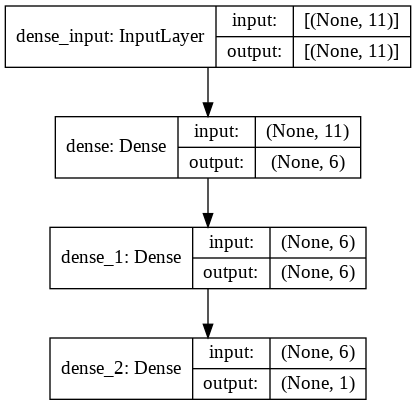

In [11]:
keras.utils.plot_model(model, show_shapes=True)

#**Fit model**

In [12]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta=0.001,
    patience=20,
    restore_best_weights=True
)

In [13]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=32,
    epochs=200,
    callbacks=[early_stopping],
    verbose=0 #turn off training log
)

#**Đánh giá model**

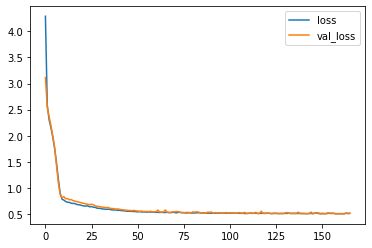

In [14]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()

In [15]:
print('Minium validation loss: {}'. format(history_df['val_loss'].min()))

Minium validation loss: 0.5003769397735596


#**Dự đoán kết quả**

In [17]:
y_valid_hat = model.predict(X_valid)
y_valid_hat[:5]

array([[5.0603504],
       [5.61914  ],
       [5.285756 ],
       [5.512359 ],
       [5.0473866]], dtype=float32)

In [18]:
y_valid_hat.round(0)[:5]

array([[5.],
       [6.],
       [5.],
       [6.],
       [5.]], dtype=float32)

In [19]:
from sklearn.metrics import mean_absolute_error

In [20]:
mean_absolute_error(y_valid, y_valid_hat.round(0))

0.45

#**Save model**

In [32]:
model.save('ANN_Wine.h5') # File HDF5

In [33]:
from tensorflow.keras.models import load_model
model_load = load_model('ANN_Wine.h5')

In [34]:
y_valid_hat_new = model_load.predict(X_valid)
y_valid_hat_new.round(0)[:3]

array([[5.],
       [6.],
       [5.]], dtype=float32)

#**Tối ưu hóa model**

In [38]:
model_2 = keras.Sequential([
                            layers.Dense(6, activation='relu', input_shape=[11]),
                            layers.Dropout(0.3),
                            layers.BatchNormalization(),
                            layers.Dense(6, activation='relu', input_shape=[11]),
                            layers.Dense(6, activation='relu', input_shape=[11]),
                            layers.Dropout(0.3),
                            layers.BatchNormalization(),
                            layers.Dense(1)
])

In [39]:
model_2.compile(
    optimizer='adam',
    loss='mae',
    metrics=['mse', 'mae']
)

In [42]:
history_2 = model_2.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=32,
    epochs=200,
    callbacks=[early_stopping],
    # verbose=0 #turn off training log
)

Epoch 1/200
35/35 [==============================] - 0s 9ms/step - loss: 0.6391 - mse: 0.6987 - mae: 0.6391 - val_loss: 0.6364 - val_mse: 0.6651 - val_mae: 0.6364
Epoch 2/200
35/35 [==============================] - 0s 8ms/step - loss: 0.6319 - mse: 0.6919 - mae: 0.6319 - val_loss: 0.6394 - val_mse: 0.6664 - val_mae: 0.6394
Epoch 3/200
35/35 [==============================] - 0s 7ms/step - loss: 0.6344 - mse: 0.6984 - mae: 0.6344 - val_loss: 0.6398 - val_mse: 0.6664 - val_mae: 0.6398
Epoch 4/200
35/35 [==============================] - 0s 8ms/step - loss: 0.6157 - mse: 0.6611 - mae: 0.6157 - val_loss: 0.6380 - val_mse: 0.6690 - val_mae: 0.6380
Epoch 5/200
35/35 [==============================] - 0s 8ms/step - loss: 0.6191 - mse: 0.6819 - mae: 0.6191 - val_loss: 0.6344 - val_mse: 0.6634 - val_mae: 0.6344
Epoch 6/200
35/35 [==============================] - 0s 8ms/step - loss: 0.6364 - mse: 0.6929 - mae: 0.6364 - val_loss: 0.6319 - val_mse: 0.6589 - val_mae: 0.6319
Epoch 7/200
35/35 [===

#**Đánh giá model**

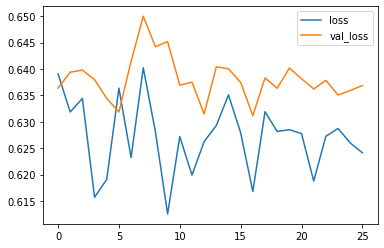

In [46]:
history_df2 = pd.DataFrame(history_2.history)
history_df2.loc[:, ['loss', 'val_loss']].plot()

In [47]:
print('Minium validation loss: {}'. format(history_df2['val_loss'].min()))

Minium validation loss: 0.6311555504798889


#**Sử dụng GridSearchCV**

In [48]:
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

In [49]:
def build_regressor(optimizer):
  model = keras.Sequential([
                          layers.Dense(6, activation='relu', input_shape=[11]),
                          layers.Dense(6, activation='relu', input_shape=[11]),
                          layers.Dense(1)
])
  model.compile(
    optimizer='adam',
    loss='mae',
    metrics=['mse', 'mae']
)
  return model

In [50]:
regressor = KerasRegressor(build_fn=build_regressor)

#Định nghĩa tham số trong gridsearchCV

parameters = {'batch_size': [32, 64, 128],
              'epochs': [100, 150, 200],
              'optimizer': ['adam', 'rmsprop', 'sgd']}

In [52]:
gridsearch = GridSearchCV(estimator=regressor,
                          param_grid=parameters,
                          scoring='neg_mean_squared_error',
                          cv=5)
gridsearch = gridsearch.fit(X_train, y_train)

Epoch 1/100
28/28 [==============================] - 1s 4ms/step - loss: 2.6103 - mse: 10.5279 - mae: 2.6103
Epoch 2/100
28/28 [==============================] - 0s 4ms/step - loss: 2.3163 - mse: 8.2024 - mae: 2.3163
Epoch 3/100
28/28 [==============================] - 0s 4ms/step - loss: 2.0970 - mse: 6.7016 - mae: 2.0970
Epoch 4/100
28/28 [==============================] - 0s 4ms/step - loss: 1.8955 - mse: 5.5278 - mae: 1.8955
Epoch 5/100
28/28 [==============================] - 0s 4ms/step - loss: 1.6889 - mse: 4.4977 - mae: 1.6889
Epoch 6/100
28/28 [==============================] - 0s 4ms/step - loss: 1.4969 - mse: 3.5955 - mae: 1.4969
Epoch 7/100
28/28 [==============================] - 0s 4ms/step - loss: 1.3164 - mse: 2.8364 - mae: 1.3164
Epoch 8/100
28/28 [==============================] - 0s 4ms/step - loss: 1.1668 - mse: 2.2362 - mae: 1.1668
Epoch 9/100
28/28 [==============================] - 0s 4ms/step - loss: 1.0500 - mse: 1.8120 - mae: 1.0500
Epoch 10/100
28/28 [=======

KeyboardInterrupt: ignored

In [53]:
best_parameters = gridsearch.best_params_
best_score = gridsearch.best_score_

print('best parameter = ', best_parameters)
print('best score = ', best_score)

AttributeError: ignored